## Goal: 
In this notebook, we will extract features with SIFT and try to find correspondences between different images.
## Setup: 
Dependencies: python3, jupyter, opencv, matplotlib, numpy

In [1]:
# Load packages
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

### Let's look at the images. 

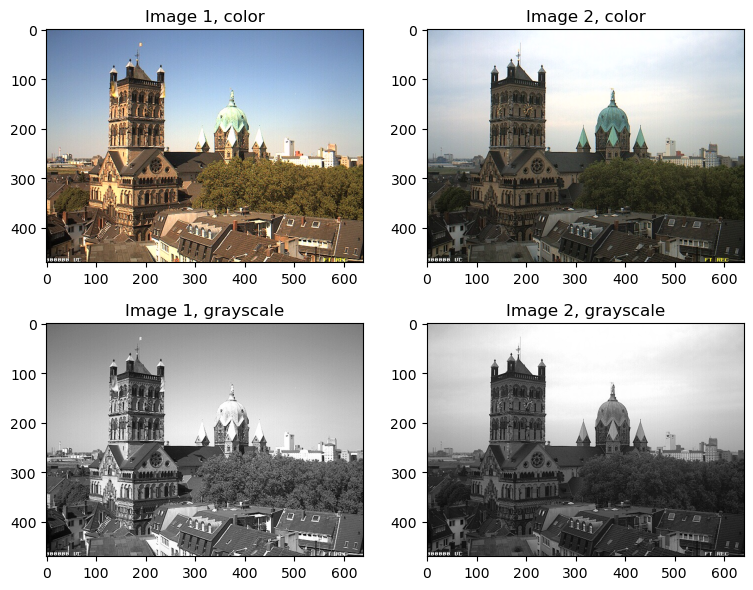

In [2]:
# Load RGB and grayscale images for Image 1 
img1 = cv.imread('2.ppm')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img1_gray= cv.cvtColor(img1,cv.COLOR_RGB2GRAY)

# Load RGB and grayscale images for Image 2
img2 = cv.imread('3.ppm')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img2_gray= cv.cvtColor(img2,cv.COLOR_RGB2GRAY)

# Show images
fig, axs = plt.subplots(2, 2, figsize=(9,7))
axs[0, 0].imshow(img1)
axs[0, 0].set_title('Image 1, color')
axs[0, 1].imshow(img2)
axs[0, 1].set_title('Image 2, color')
axs[1, 0].imshow(img1_gray, cmap="gray")
axs[1, 0].set_title('Image 1, grayscale')
axs[1, 1].imshow(img2_gray, cmap="gray")
axs[1, 1].set_title('Image 2, grayscale')
plt.show()

### Now let's detect keypoints using SIFT. 

In [3]:
# Initiate SIFT detector
sift = cv.SIFT_create()

# Detect keypoints
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)

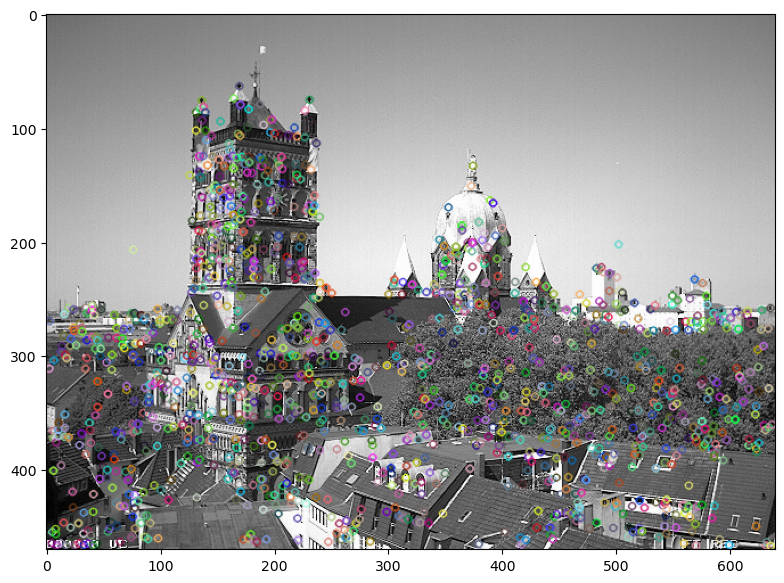

In [4]:
# Show the keypoints for Image 1
img1_kp = img1.copy()
img1_kp = cv.drawKeypoints(img1_gray, kp1, img1_kp)
fig_rgb = plt.figure(figsize=(9.4, 12.8))
ax_rgb = fig_rgb.subplots()
ax_rgb.imshow(img1_kp)
plt.show()

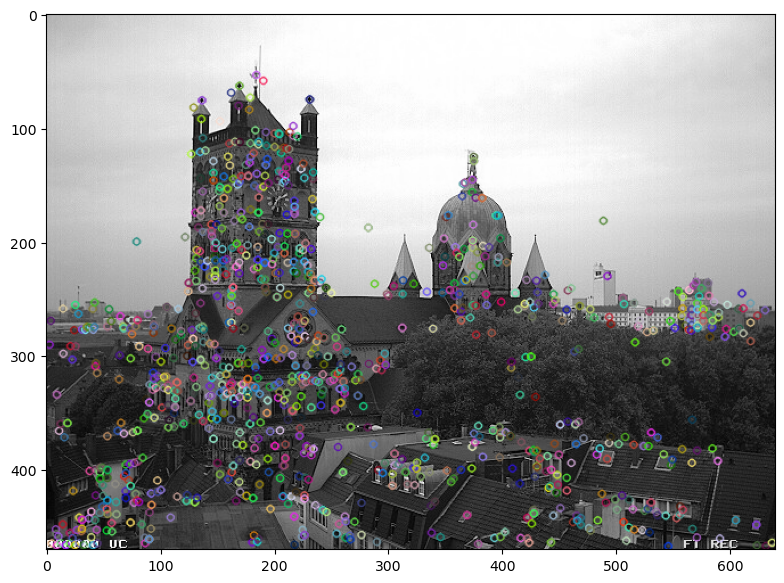

In [5]:
# Show the keypoints for Image 2
img2_kp = img2.copy()
img2_kp = cv.drawKeypoints(img2_gray, kp2, img2_kp)
fig_rgb = plt.figure(figsize=(9.4, 12.8))
ax_rgb = fig_rgb.subplots()
ax_rgb.imshow(img2_kp)
plt.show()

### Now we'll match the features.

In [6]:
# Create feature matcher
bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)

# Match descriptors of both images
matches = bf.match(des1, des2)

### Let's sort the matches by distance and draw the first 100 matches.

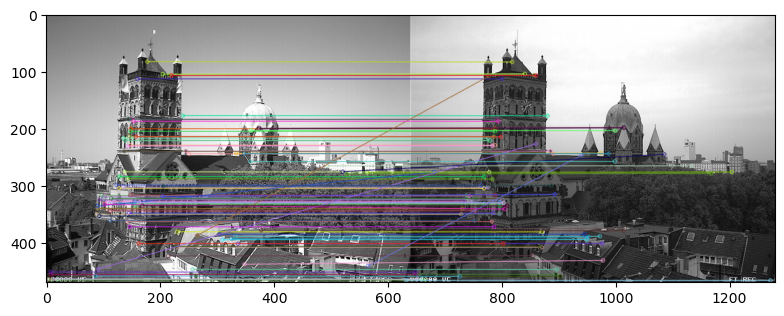

In [7]:
# Sort matches by distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 100 matches
matched_img = cv.drawMatches(img1_gray, kp1, img2_gray, kp2, matches[:100], img2_gray, flags=2)

# Show the image
fig, ax = plt.subplots(figsize=(9.4, 25.6))
plt.imshow(matched_img)
plt.show()